In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df=df.drop('CustomerID',axis=1)

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

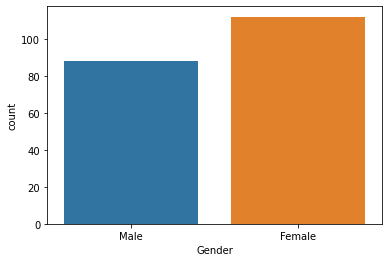

In [14]:
sns.countplot(data=df,x=df.Gender)

<AxesSubplot:xlabel='Age', ylabel='Count'>

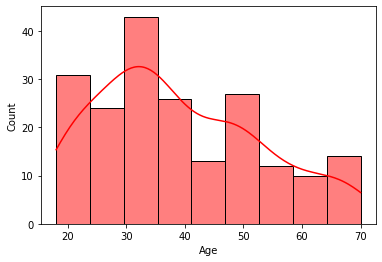

In [17]:
sns.histplot(df.Age,kde=True,color='red')

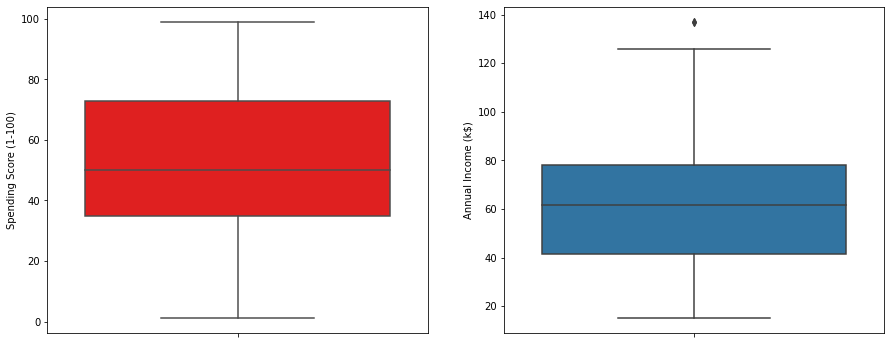

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

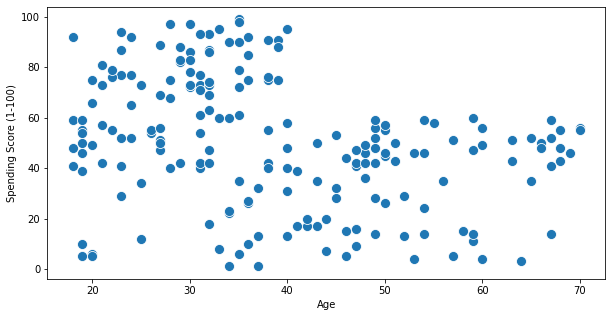

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],s=100)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

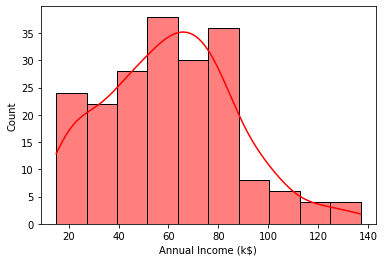

In [34]:
sns.histplot(df["Annual Income (k$)"],kde=True,color='red')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

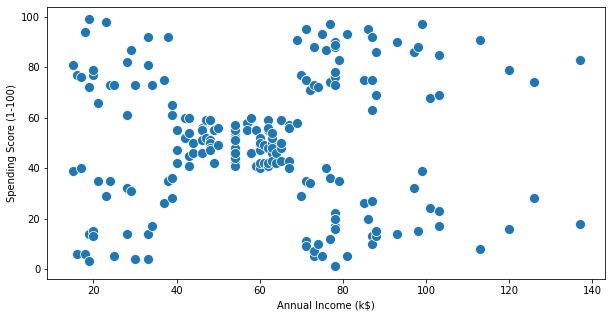

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Annual Income (k$)"],y=df['Spending Score (1-100)'],s=100)

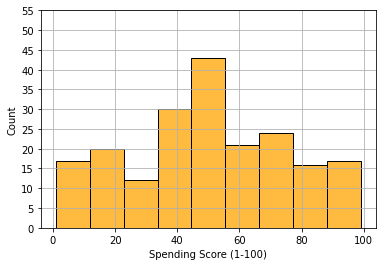

In [146]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'],color='orange')
plt.yticks(np.arange(0,60,5));
plt.grid()
plt.show()

In [37]:
df = pd.get_dummies(df,drop_first=True)

In [38]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [163]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_cluster = KMeans(n_clusters=6, random_state=0)

In [164]:
ssd = []

for k in range(1,11):
    
    model = KMeans(n_clusters=k,init='k-means++',random_state=0)
    
    
    model.fit(df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\Users\bverm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


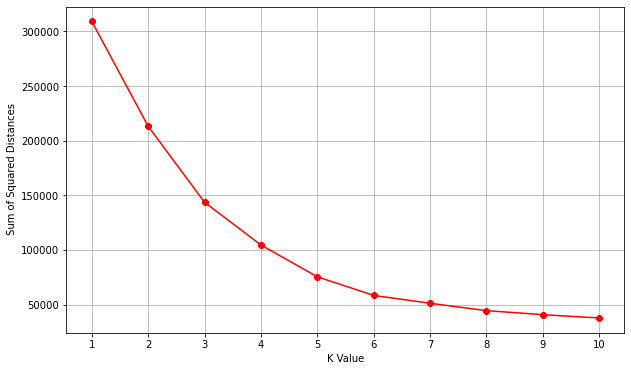

In [165]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(range(1,11),ssd,color="red", marker ="8")
plt.grid()
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xticks(np.arange(1,11,1));

In [166]:
ssd

[309121.01499999996,
 213146.99641943723,
 143577.4870971988,
 104511.04827453246,
 75399.61541401486,
 58361.11396147714,
 51143.16267942583,
 44406.299057492215,
 40720.52596302465,
 37685.756589961784]

In [167]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -95974.018581
2   -69569.509322
3   -39066.438823
4   -29111.432861
5   -17038.501453
6    -7217.951282
7    -6736.863622
8    -3685.773094
9    -3034.769373
dtype: float64

In [168]:
k_cluster.fit_predict(df)
k_labels = k_cluster.labels_

In [169]:
k_labels

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 5, 4,
       5, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [170]:
df['label']=k_labels

In [171]:
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  label
0     19                  15                      39            1      5
1     21                  15                      81            1      3
2     20                  16                       6            0      5
3     23                  16                      77            0      3
4     31                  17                      40            0      5
..   ...                 ...                     ...          ...    ...
195   35                 120                      79            0      1
196   45                 126                      28            0      0
197   32                 126                      74            1      1
198   32                 137                      18            1      0
199   30                 137                      83            1      1

[200 rows x 5 columns]


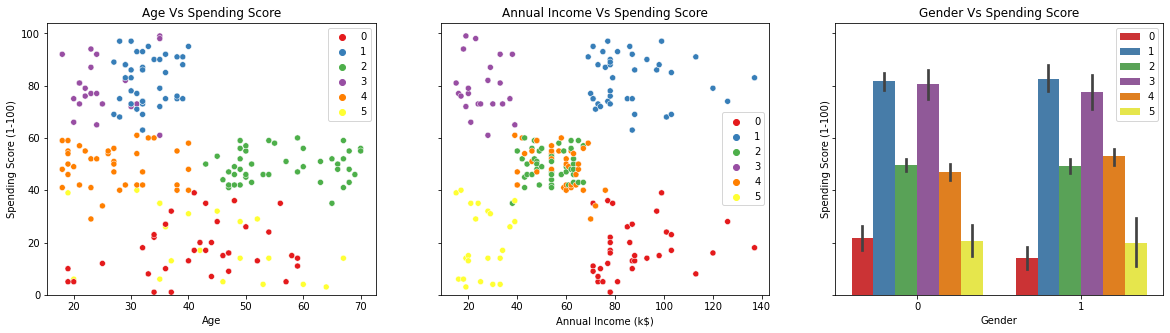

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df['Age'], y=df['Spending Score (1-100)'],hue=k_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=k_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df['Gender_Male'], y=df['Spending Score (1-100)'],hue=k_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

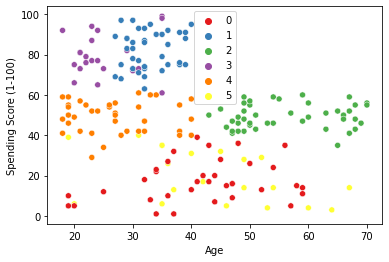

In [173]:
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'],hue=k_labels,palette='Set1')
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

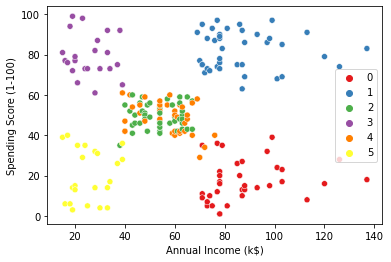

In [174]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=k_labels,palette='Set1')


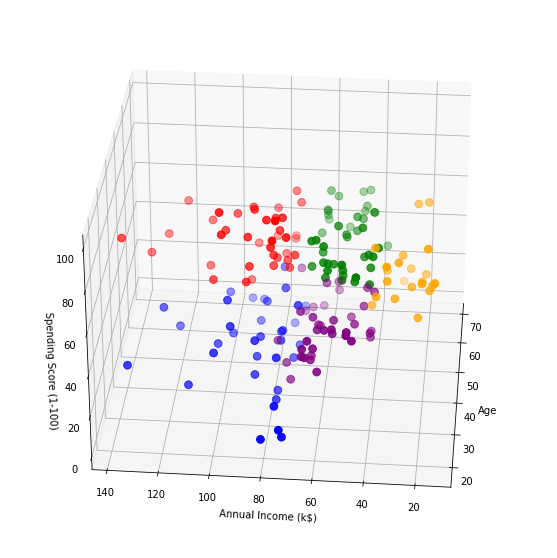

In [175]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

In [152]:
coef = metrics.silhouette_score(df,k_labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.4445512214568559


In [160]:
k_cluster = KMeans(n_clusters=4, random_state=0)
labels=k_cluster.fit_predict(df)

In [161]:
coef = metrics.silhouette_score(df,labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.40554718019572006
